Let's get datablocks.


In [1]:
# Use CPU to prevent hard lockups during development
# %env CUDA_VISIBLE_DEVICES=""

In [2]:
from fastai.data.all import *
from fastai.vision.all import *

import fastai.torch_core

fastai.torch_core.defaults.device = 'cpu'

print("Set to CPU default")
torch.cuda.device_count()


Set to CPU default


1

This is the scheme!

```csv
# file_name	scenescore_1	score_2	score_3	score_4	score_5	score_6
```

In [3]:
from dataclasses import dataclass
import natsort
import pathlib
from typing import List
import cv2
from numpy.core.multiarray import ndarray
from scene import Screen, TitleScreen, MarioGameScreen, RadRacerGameScreen, TetrisGameScreen, ScoreScreen

In [4]:
samples_paths = pathlib.Path('samples').glob('*.png')
non_yt_sample_paths = [sample for sample in samples_paths if 'yt' not in str(sample)]

print(non_yt_sample_paths)

[Path('samples/snap_10142.png'), Path('samples/snap_10452.png'), Path('samples/snap_10683.png'), Path('samples/snap_1079.png'), Path('samples/snap_11118.png'), Path('samples/snap_120.png'), Path('samples/snap_12417.png'), Path('samples/snap_13042.png'), Path('samples/snap_14042.png'), Path('samples/snap_17935.png'), Path('samples/snap_19519.png'), Path('samples/snap_20038.png'), Path('samples/snap_2078.png'), Path('samples/snap_2387.png'), Path('samples/snap_24277.png'), Path('samples/snap_24356.png'), Path('samples/snap_24523.png'), Path('samples/snap_2576.png'), Path('samples/snap_2791.png'), Path('samples/snap_2969.png'), Path('samples/snap_3177.png'), Path('samples/snap_3267.png'), Path('samples/snap_3490.png'), Path('samples/snap_3558.png'), Path('samples/snap_3644.png'), Path('samples/snap_3898.png'), Path('samples/snap_4361.png'), Path('samples/snap_44501.png'), Path('samples/snap_44578.png'), Path('samples/snap_44806.png'), Path('samples/snap_44930.png'), Path('samples/snap_450

In [5]:
screens: List[Screen] = [
    TitleScreen(),
    MarioGameScreen(),
    RadRacerGameScreen(),
    TetrisGameScreen(),
]

@dataclass
class TrainingCsvEntry:
    path: str
    scene_name: str
    score_0: str="n/a"
    score_1: str="n/a"
    score_2: str="n/a"
    score_3: str="n/a"
    score_4: str="n/a"
    score_5: str="n/a"

def process_path(path: pathlib.Path):

    hsv_image = cv2.imread(str(path))

    frame = cv2.resize(hsv_image, (256, 224))

    for screen in screens:
        hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        if screen.match(hsv_image):
            if isinstance(screen, ScoreScreen):
                score = screen.score(hsv_image)
                score_list = list(f'{score:06}')
                return TrainingCsvEntry(
                    path=path,
                    scene_name = screen.__class__.__name__,
                    score_0=score_list[0],
                    score_1=score_list[1],
                    score_2=score_list[2],
                    score_3=score_list[3],
                    score_4=score_list[4],
                    score_5=score_list[5],
                )
    return TrainingCsvEntry(
        path=path,
        scene_name="n/a",
    )


csv_data = {sample_path: process_path(sample_path) for sample_path in natsort.os_sorted(non_yt_sample_paths)}

print(csv_data)

{Path('samples/snap_120.png'): TrainingCsvEntry(path=Path('samples/snap_120.png'), scene_name='n/a', score_0='n/a', score_1='n/a', score_2='n/a', score_3='n/a', score_4='n/a', score_5='n/a'), Path('samples/snap_459.png'): TrainingCsvEntry(path=Path('samples/snap_459.png'), scene_name='n/a', score_0='n/a', score_1='n/a', score_2='n/a', score_3='n/a', score_4='n/a', score_5='n/a'), Path('samples/snap_762.png'): TrainingCsvEntry(path=Path('samples/snap_762.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_857.png'): TrainingCsvEntry(path=Path('samples/snap_857.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_1079.png'): TrainingCsvEntry(path=Path('samples/snap_1079.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_2078.png'): TrainingCsv

In [6]:
from fastai.data.all import *
from fastai.vision.all import *

number_values = [
    'n/a',
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
]

NumberCategoryBlock = CategoryBlock(vocab=number_values)

SceneCategoryBlock = CategoryBlock(vocab=[
    'n/a',
    'TitleScreen',
    'MarioGameScreen',
    'RadRacerGameScreen',
    'TetrisGameScreen',
])

def label_func(o):
    print(repr(o))
    return o



dblock = DataBlock(
    blocks=(
        ImageBlock,
        SceneCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
    ),

    get_y=[
        lambda path: csv_data[path].scene_name,
        lambda path: csv_data[path].score_0,
        lambda path: csv_data[path].score_1,
        lambda path: csv_data[path].score_2,
        lambda path: csv_data[path].score_3,
        lambda path: csv_data[path].score_4,
        lambda path: csv_data[path].score_5,
    ],
    splitter=RandomSplitter(),
#     item_tfms = [Resize(256, 224)],
    n_inp=1, )
print("setup!")


setup!


In [7]:
dblock.summary(csv_data.keys())
print("can this load the paths!")

Setting-up type transforms pipelines
Found 53 items
2 datasets of sizes 43,10
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['MarioGameScreen', 'RadRacerGameScreen', 'TetrisGameScreen', 'TitleScreen', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': T


Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImage mode=RGB size=256x224, TensorCategory(4, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32))
    applying ToTensor gives
      (TensorImage of size 3x224x256, TensorCategory(4, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32), TensorCategory(10, dtype=torch.int32))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}
    starting from
      (TensorImage of size 4x3x224x256, T

In [8]:
dsets = dblock.datasets(csv_data.keys())
dsets[0]
dsets.vocab

(#7) [['MarioGameScreen', 'RadRacerGameScreen', 'TetrisGameScreen', 'TitleScreen', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a']]

In [9]:
type(dsets[5][1])

fastai.torch_core.TensorCategory

In [10]:
list(csv_data.keys())

[Path('samples/snap_120.png'),
 Path('samples/snap_459.png'),
 Path('samples/snap_762.png'),
 Path('samples/snap_857.png'),
 Path('samples/snap_1079.png'),
 Path('samples/snap_2078.png'),
 Path('samples/snap_2387.png'),
 Path('samples/snap_2576.png'),
 Path('samples/snap_2791.png'),
 Path('samples/snap_2969.png'),
 Path('samples/snap_3177.png'),
 Path('samples/snap_3267.png'),
 Path('samples/snap_3490.png'),
 Path('samples/snap_3558.png'),
 Path('samples/snap_3644.png'),
 Path('samples/snap_3898.png'),
 Path('samples/snap_4361.png'),
 Path('samples/snap_4633.png'),
 Path('samples/snap_4835.png'),
 Path('samples/snap_5091.png'),
 Path('samples/snap_5508.png'),
 Path('samples/snap_6046.png'),
 Path('samples/snap_6155.png'),
 Path('samples/snap_6244.png'),
 Path('samples/snap_9632.png'),
 Path('samples/snap_10142.png'),
 Path('samples/snap_10452.png'),
 Path('samples/snap_10683.png'),
 Path('samples/snap_11118.png'),
 Path('samples/snap_12417.png'),
 Path('samples/snap_13042.png'),
 Path(

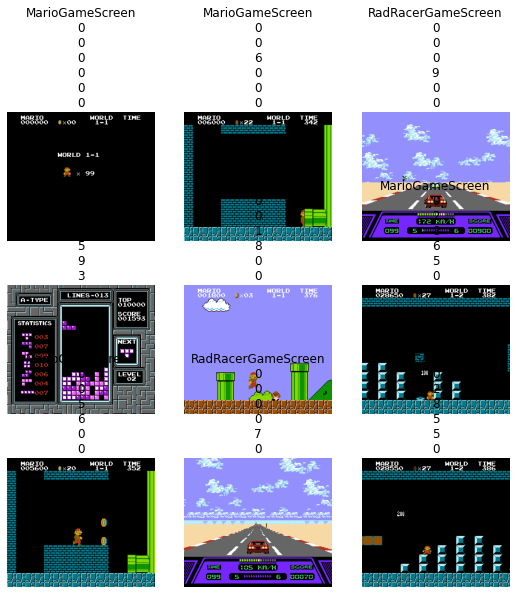

In [11]:
dls = dblock.dataloaders(csv_data.keys(), bs=40, num_workers=0)
dls.show_batch()

In [12]:
dls.loss_func

(#7) [FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss(),FlattenedLoss of CrossEntropyLoss()]

In [24]:
class MultiTaskModel(nn.Module):
    """
    Creates a MTL model with the encoder from "arch" and with dropout multiplier ps.
    """
    def __init__(self, arch,ps=0.5):
        super(MultiTaskModel,self).__init__()
        self.encoder = create_body(arch)        #fastai function that creates an encoder given an architecture
        self.fc_scene_name = create_head(1024,len(screens) + 1,ps=ps)
        self.fc_score_0 = create_head(1024+len(screens)+1,len(number_values),ps=ps)
        self.fc_score_1 = create_head(1024+len(screens)+1,len(number_values),ps=ps)
        self.fc_score_2 = create_head(1024+len(screens)+1,len(number_values),ps=ps)
        self.fc_score_3 = create_head(1024+len(screens)+1,len(number_values),ps=ps)
        self.fc_score_4 = create_head(1024+len(screens)+1,len(number_values),ps=ps)
        self.fc_score_5 = create_head(1024+len(screens)+1,len(number_values),ps=ps)

    def forward(self,x):

        x = self.encoder(x)
        scene_name = self.fc_scene_name(x)
        score_0 = self.fc_score_0(x)
        score_1 = self.fc_score_1(x)
        score_2 = self.fc_score_2(x)
        score_3 = self.fc_score_3(x)
        score_4 = self.fc_score_4(x)
        score_5 = self.fc_score_5(x)

        return [scene_name, score_0, score_1, score_2, score_3, score_4, score_5]

print("Defined MultiTaskModel")


class MultiTaskLossWrapper(nn.Module):
    def __init__(self, task_num):
        super(MultiTaskLossWrapper, self).__init__()
        self.task_num = task_num
        self.log_vars = nn.Parameter(torch.zeros((task_num)))

    def forward(self,
                preds,
                scene_name,
                score_0,
                score_1,
                score_2,
                score_3,
                score_4,
                score_5
                ):


        loss0 = dls.loss_func[0](preds[0], scene_name)
        loss1 = dls.loss_func[1](preds[1], score_0)
        loss2 = dls.loss_func[2](preds[2], score_1)
        loss3 = dls.loss_func[3](preds[2], score_2)
        loss4 = dls.loss_func[4](preds[2], score_3)
        loss5 = dls.loss_func[5](preds[2], score_4)
        loss6 = dls.loss_func[6](preds[2], score_5)


        precision0 = torch.exp(-self.log_vars[0])
        loss0 = precision0*loss0 + self.log_vars[0]

        precision1 = torch.exp(-self.log_vars[1])
        loss1 = precision1*loss1 + self.log_vars[1]

        precision2 = torch.exp(-self.log_vars[2])
        loss2 = precision2*loss2 + self.log_vars[2]

        precision3 = torch.exp(-self.log_vars[3])
        loss3 = precision3*loss3 + self.log_vars[3]

        precision4 = torch.exp(-self.log_vars[4])
        loss4 = precision4*loss4 + self.log_vars[4]

        precision5 = torch.exp(-self.log_vars[5])
        loss5 = precision5*loss5 + self.log_vars[5]

        precision6 = torch.exp(-self.log_vars[6])
        loss6 = precision6*loss6 + self.log_vars[6]


        return loss0+loss1+loss2+loss3+loss4+loss5+loss6

print("Definied MultiTaskLossWrapper")

Defined MultiTaskModel
Definied MultiTaskLossWrapper


In [14]:
def acc_scene_name(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[0], scene_name)
def acc_score_0(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[1], score_0)
def acc_score_1(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[2], score_1)
def acc_score_2(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[3], score_2)
def acc_score_3(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[4], score_3)
def acc_score_4(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[5], score_4)
def acc_score_5(preds, scene_name, score_0, score_1, score_2, score_3, score_4, score_5): return accuracy(preds[6], score_5)

metrics = [acc_scene_name, acc_score_0, acc_score_1, acc_score_2, acc_score_3, acc_score_4, acc_score_5]

In [25]:

model = MultiTaskModel(models.resnet34, ps=0.25)


loss_func = MultiTaskLossWrapper(7)

learn = Learner(dls, model, loss_func=loss_func, metrics=metrics)
# learn.freeze()

In [16]:
torch.cuda.get_device_name()

'GeForce RTX 2080'

In [17]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='GeForce RTX 2080', major=7, minor=5, total_memory=8192MB, multi_processor_count=46)

In [26]:
learn.lr_find()

RuntimeError: Tensors must have same number of dimensions: got 2 and 4

In [19]:
learn.fit_one_cycle(100, 1e-2)

epoch,train_loss,valid_loss,acc_scene_name,acc_score_0,acc_score_1,acc_score_2,acc_score_3,acc_score_4,acc_score_5,time
0,18.069450,12.998133,0.500000,0.200000,0.400000,0.200000,0.000000,0.000000,0.200000,00:00
1,14.762126,11.269696,1.000000,0.400000,0.500000,0.100000,0.000000,0.000000,0.100000,00:00
2,12.482343,10.295456,1.000000,0.900000,0.500000,0.100000,0.000000,0.000000,0.200000,00:00
3,11.075098,9.034461,1.000000,1.000000,0.600000,0.100000,0.000000,0.000000,0.400000,00:00
4,10.011458,8.124377,1.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.500000,00:00
5,9.181196,8.271338,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.500000,00:00
6,8.563333,9.572140,0.900000,1.000000,0.800000,0.000000,0.000000,0.000000,0.500000,00:00
7,8.079277,10.550411,0.900000,1.000000,0.700000,0.000000,0.000000,0.000000,0.400000,00:00
8,7.751319,12.117550,0.900000,1.000000,0.600000,0.000000,0.000000,0.000000,0.400000,00:00
9,7.477608,12.806330,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.500000,00:00
